Toronto Blue Jays/ New York Yankees Home Opener - Twitter Analysis
------------------------------------------------

All tweeting activity from 11:50am until 10 minutes after the end of the game.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.mpl_style', 'default')
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)
plt.rcParams['figure.figsize'] = (15, 5)
import pymongo
from pymongo import MongoClient

client = pymongo.MongoClient('localhost', 27017)

db = client.yankees_opener
collection = db['Tweets']
cursor = collection.find()

In [2]:
df = pd.DataFrame(list(cursor))
df[:3]

,_id,geo,location,name,screen_name,source,text,time
0,5522ab2a7e9aed1090b4e703,None,,Natasha,s0_7293,Twitter for BlackBerry®,RT @Yankees: And Yankees Snapchat is here! Add...,11:50
1,5522ab2a7e9aed1090b4e704,None,,Megs,meglinds02,Twitter Web Client,Lets hope the Yankees have a good season this ...,11:50
2,5522ab2b7e9aed1090b4e705,None,"New York, NY",Dinner With The Boys,DinnerPlayNYC,Twitter Web Client,Member of @BaseballHall ex @Yankees manager Jo...,11:50


In [3]:
df.set_index('time', drop=False, inplace=True)

In [4]:
df.head()

,_id,geo,location,name,screen_name,source,text,time
time,,,,,,,,
11:50,5522ab2a7e9aed1090b4e703,None,,Natasha,s0_7293,Twitter for BlackBerry®,RT @Yankees: And Yankees Snapchat is here! Add...,11:50
11:50,5522ab2a7e9aed1090b4e704,None,,Megs,meglinds02,Twitter Web Client,Lets hope the Yankees have a good season this ...,11:50
11:50,5522ab2b7e9aed1090b4e705,None,"New York, NY",Dinner With The Boys,DinnerPlayNYC,Twitter Web Client,Member of @BaseballHall ex @Yankees manager Jo...,11:50
11:50,5522ab2b7e9aed1090b4e706,None,大阪府寝屋川市,アンジェラス,angelus_0923,Twitter for iPhone,RT @Yankees: If you're heading to Yankee Stadi...,11:50
11:50,5522ab2c7e9aed1090b4e707,None,"Burlington, Ontario, Canada",Brian Cappellaro,bcappellaro,Twitter for BlackBerry,RT @Wilnerness590: Happy Opening Day!!! #Bluej...,11:50


In [5]:
cities = ['Toronto', 'TO', 'Montreal', 'Timmins', 'Ottawa', 'Ontario', 'Quebec', 'Canada', 'NY', 'New York', 'N.Y.']
for i in cities:
    print "{} - {}".format(i, df.location.str.contains(i).sum())

Toronto - 1152
TO - 118
Montreal - 37
Timmins - 4
Ottawa - 108
Ontario - 619
Quebec - 4
Canada - 1015
NY - 4511
New York - 3342
N.Y. - 98


Total number of tweets with the word "yankees".  11:50am to 4:27pm.
---------------------------------------------------------------------

In [6]:
total_tweets = pd.Series.count(df['time'])
total_tweets

66191

Show the heaviest tweeting times
-------------------------------------

That peak is the Edwin Encarnacion HR in the 3rd.

A little after 3pm Devon Travis causes a stir with his first major league hit, a HR no less.

The last peak is the end of the game when twitter activity always spikes.

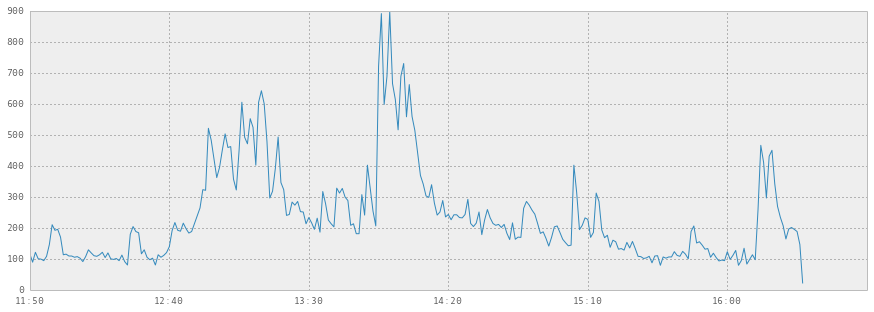

In [7]:
dbase1m = pd.Series.value_counts(df['time'], normalize=False, sort=True, ascending=False, bins=None)
tweet_freq = dbase1m.sort_index()
tweet_freq.plot()

Average tweets per minute during the game
----------------------------------------------------

In [8]:
avg = int(dbase1m.mean())
avg

238

Most frequent locations tweeted from during the game
-----------------------------------------------------------------
This is all over the place because anyone is free to put any location they want in twitter.

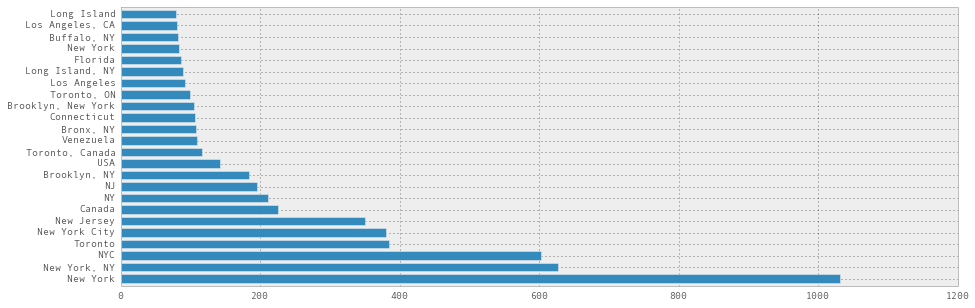

In [9]:
tweeted_from = pd.Series.value_counts(df['location'], normalize=False, sort=True, ascending=False, bins=None)
tweeted_from[1:25].plot(kind='barh')

In [10]:
tweeted_from[1:50]

New York                   1032
New York, NY                627
NYC                         603
Toronto                     385
New York City               381
New Jersey                  351
Canada                      225
NY                          211
NJ                          195
Brooklyn, NY                184
USA                         142
Toronto, Canada             116
Venezuela                   110
Bronx, NY                   108
Connecticut                 107
Brooklyn, New York          105
Toronto, ON                 100
Los Angeles                  92
Long Island, NY              90
Florida                      87
New York                     84
Buffalo, NY                  82
Los Angeles, CA              81
Long Island                  80
New York, New York           78
Boston, MA                   76
Boston                       75
Chicago, IL                  75
Texas                        73
Chicago                      72
Toronto, Ontario             72
México  

Todays Top 5 Tweets
--------------------

In [11]:
top_tweet = pd.Series.value_counts(df['text'], normalize=False, sort=True, ascending=False, bins=None)
top_tweet[:5]

RT @SportsNation: .@Yankees fans on #OpeningDay: http://t.co/TFoVpVrdC6    2571
RT @Yankees: Brace yourselves, #TanakaTime is coming. #OpeningDay http://t.co/eBGbKasKtY    1598
RT @AthleteSwag: First Opening Day in 20 years the Yankees have a different person playing shortstop other than Derek Jeter http://t.co/alP…    1453
RT @SportsCenter: Yankees DH Alex Rodriguez receives loud ovation from crowd before drawing walk in his first regular season at-bat since S…     892
RT @SportsCenter: Alex Rodriguez will bat 7th in his 1st regular season game since Sept. 25, 2013.\n\nBlue Jays vs Yankees, 1 ET on ESPN. htt…     758
dtype: int64

The day's top tweeters
-------------------------

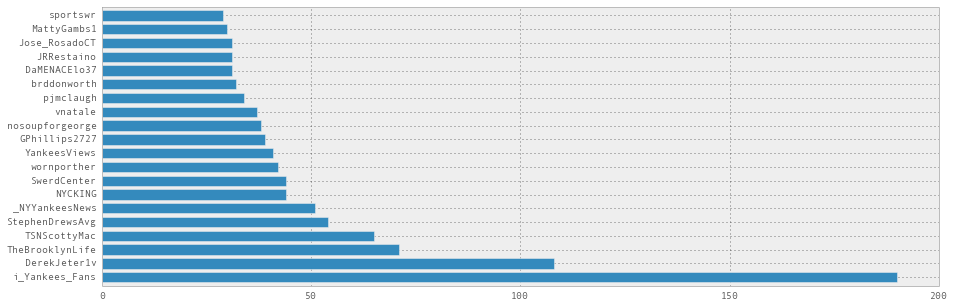

In [12]:
top_tweeter = pd.Series.value_counts(df['name'], normalize=False, sort=True, ascending=False, bins=None)
top_tweeter_screen_name = pd.Series.value_counts(df['screen_name'], normalize=False, sort=True, ascending=False, bins=None)
top_tweeter_screen_name[:20].plot(kind='barh')

The most popular platforms for tweeting
--------------------------------------------

Iphones are pretty much the most popular with baseball fans.

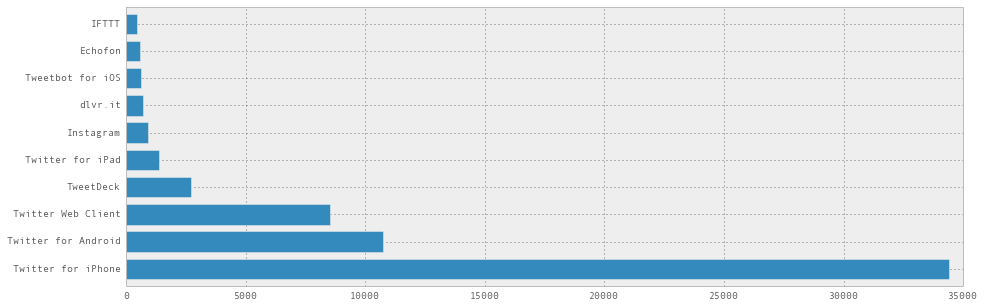

In [13]:
source_tweet = pd.Series.value_counts(df['source'], normalize=False, sort=True, ascending=False, bins=None)
source_tweet[:10].plot(kind='barh')

The following code simply filters out common words like "the" & "and" etc. etc.
------------------------------------------------------------------------------------------

In [14]:
import nltk
from nltk.corpus import stopwords
from nltk import FreqDist
stop = stopwords.words('english')
stop2 = stopwords.words('spanish')
otherwords = ['rt', 'vs', '-', '&amp;', '', '/', 'it\'s']
text = df['text']
tokens = []
for txt in text.values:
    tokens.extend([t.lower().strip(":,.") for t in txt.split()])

In [15]:
filtered_tokens = [w for w in tokens if not w in stop]
filtered_tokens_spanish = [w for w in filtered_tokens if not w in stop2]
other_filtered = [w for w in filtered_tokens_spanish if not w in otherwords]
freq_dist = nltk.FreqDist(other_filtered)
z = 20
print "The {} most common words tweeted;".format(z)
x = sorted(freq_dist, key=lambda key: (-freq_dist[key], key))[:z]
for entry  in x:
    print entry

The 20 most common words tweeted;
yankees
#openingday
@yankees
#yankees
opening
day
season
fans
first
go
jays
game
blue
rodriguez
#tanakatime
back
@bluejays
jeter
alex
@sportsnation


Plotting the top words
-------------------------

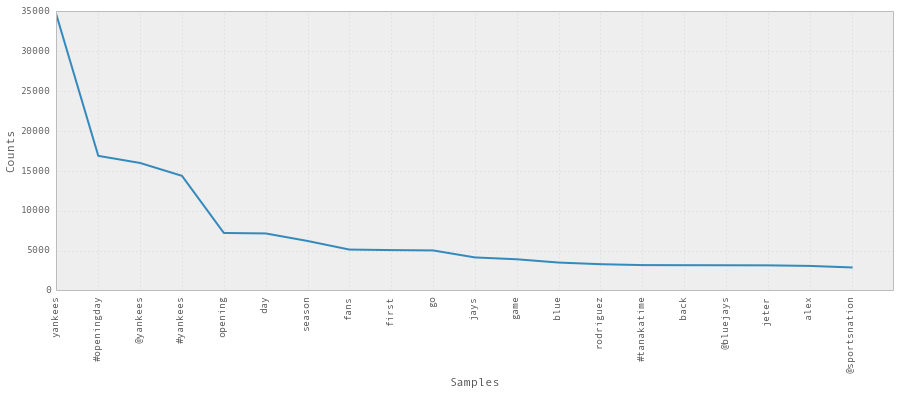

In [16]:
freq_dist.plot(20)

Use Folium to plot geo coordinates on a map
-------------------------------------------------
Only 2% of twitter users display geo coordinates when tweeting.  Still gives an interesting map of tweet locations.

In [17]:
import folium
from collections import namedtuple
filepath = "/home/al/projects/twitter/geo/yankeesgeo.html"
na_coordinates = (43.641438,-79.389353) # Rogers Centre Toronto, Ontario
na_map = folium.Map(location=na_coordinates, zoom_start=4)
Location = namedtuple('Location', ['latitude', 'longitude'])
count_locations = 0

for line in df.geo:
    if line != None:
        count_locations += 1
        geo_coordinates = line['coordinates']
        location = Location(geo_coordinates[1], geo_coordinates[0])
        na_map.circle_marker(location, popup=str(location))

na_map.create_map(filepath)

In [18]:
print str(count_locations) + " users reporting coordinates"
print str(total_tweets) + " total tweets"
percent = round(float(count_locations) / float(total_tweets) * 100, 2)
print str(percent) + "%"

1946 users reporting coordinates
66191 total tweets
2.94%


Plot those tweets on a graph
============

While only ~3% of users were reporting their coordinates this is still enough to give us an idea where they are tweeting from.  

In [19]:
from IPython.display import HTML
HTML('<iframe src=http://www.linuxnorth.org/yankeesgeo.html width=960 height=530></iframe>')